In [2]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os
# os.chdir("drive")
# os.chdir("My Drive")
# os.chdir("Machine Learning ")
# os.chdir("Project")

os.chdir("drive/My Drive/Academics/Machine Learning /Project")
!ls

 aapl_loss.PNG		      'Final Report.gdoc'
 aapl_loss.txt		       googl_loss.PNG
 aapl.us.csv		       googl_loss.txt
 amzn_loss.PNG		       LinearRegressionModel.ipynb
 amzn_loss.txt		       msft_loss.PNG
 ConvolutionalAlgo.ipynb       msft_loss.txt
 Covolution2.ipynb	       Tasks.gdoc
 Datasets		      'Zoom 2020-05-06 09-06-46.mp4'
'Final Presentation.gslides'


In [0]:
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt

def fit_mult_linear(X,y):
    """
    Given matrix of predictors X and target vector y fit for a multiple linear regression model under the squared loss.
    """
    nsamp, natt = X.shape
    ones = np.ones((nsamp,1))
    Xmat=np.matrix(X)
    ymat=np.matrix(y)
    ymat=np.transpose(ymat)
    Xmatt=np.transpose(Xmat)
    beta=np.linalg.inv(Xmatt*Xmat)*Xmatt*ymat
    
    return beta

In [6]:
x_names = ['Date','Day_of_year', 'Open', 'High', 'Low', 'Volume']
y_names = ['Close']

stock_data = pd.read_csv('Datasets/msft.us.csv', header=0)

X = stock_data.loc[:,("Open","High","Low","Volume")]
y = stock_data.loc[:, "Close"]

X_amzn = pd.read_csv('Datasets/amzn.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
y_amzn = pd.read_csv('Datasets/amzn.us.csv', header=0).loc[:, "Close"]

X_msft = pd.read_csv('Datasets/msft.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
y_msft = pd.read_csv('Datasets/msft.us.csv', header=0).loc[:, "Close"]

X_aapl = pd.read_csv('Datasets/aapl.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
y_aapl = pd.read_csv('Datasets/aapl.us.csv', header=0).loc[:, "Close"]

X_googl = pd.read_csv('Datasets/googl.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
y_googl = pd.read_csv('Datasets/googl.us.csv', header=0).loc[:, "Close"]


Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.30, shuffle=False)
reg = LinearRegression().fit(Xtr, ytr)
yhat = reg.predict(Xts)

loss1 = np.sum(np.abs(yhat[0:16]-yts[0:16]))
print(loss1)

# x_vals = np.linspace(0,len(yhat)-1,len(yhat))
# plt.plot(x_vals[0:16], yts[0:16], c="red")
# plt.plot(x_vals[0:16], yhat[0:16], c="blue")
# plt.xlabel('yhat')
# plt.ylabel('Close');

1.3913961774575974


In [0]:
stock_data.head()

,Date,Day_of_year,Open,High,Low,Close,Volume,OpenInt
0,1986-03-13,72,0.06720,0.07533,0.06720,0.07533,1371330506,0
1,1986-03-14,73,0.07533,0.07533,0.07533,0.07533,409569463,0
2,1986-03-17,76,0.07533,0.07533,0.07533,0.07533,176995245,0
3,1986-03-18,77,0.07533,0.07533,0.07533,0.07533,90067008,0
4,1986-03-19,78,0.07533,0.07533,0.07533,0.07533,63655515,0


### **Memory model with delay**

In [0]:
def create_dly_data(X,y,dly, days):
    """
    Create delayed data
    """
    Xdly = []
    # X tranformation
    for i in range(dly-days,X.shape[0]-days):
      row = np.array([])
      j = 0
      while j != dly:
        row = np.hstack([X.iloc[i-j,:],row])
        j+=1
      Xdly.append(row)
    Xdly = np.array(Xdly)

    # Y transformation
    ydly = []
    for i in range(dly,y.shape[0]):
      ydly.append(y[i])
    ydly = np.array(ydly)

    return Xdly, ydly

In [0]:
from sklearn.metrics import mean_squared_error
from scipy import stats
import math

def get_loss(X, y, delay, days):
  Xdly, ydly = create_dly_data(X,y,delay, days)
  Xtr2, Xts2, ytr2, yts2 = train_test_split(Xdly,ydly,test_size=0.30, shuffle=False)
  reg = LinearRegression()
  reg.fit(Xtr2, ytr2)
  yhat2 = reg.predict(Xts2)
  return np.mean(np.abs(yhat2-yts2))

In [0]:
X = pd.read_csv('Datasets/amzn.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
y = pd.read_csv('Datasets/amzn.us.csv', header=0).loc[:, "Close"]
def main(X, y):
  my_dict ={}
  loss_dict = {}
  days = [1, 7, 14, 21, 28]
  limit = 31
  for d in days:
    for i in range(1, limit):
      loss = get_loss(X, y, i, d)
      print("Day:", d, ", Loss:", loss, ", Delay:", i)
      if str(d) not in my_dict:
        my_dict[str(d)] = [loss, i]
        loss_dict[str(d)] = [loss]
      else:
        if loss < my_dict[str(d)][0]:
          my_dict[str(d)] = [loss, i]
        loss_dict[str(d)].append(loss)
  print("Result-----------------------")
  print("Day:", 1, ", min_loss:", my_dict["1"])
  print("Day:", 7, ", min_loss:", my_dict["7"])
  print("Day:", 14, ", min_loss:", my_dict["14"])
  print("Day:", 21, ", min_loss:", my_dict["21"])
  print("Day:", 28, ", min_loss:", my_dict["28"])

  # plot for 1 day
  # print("Prediction for 1 day ahead")
  delays = np.arange(1, limit) 
  loss = loss_dict["1"]
  plt.plot(delays, loss)
  plt.xlabel("delay")
  plt.ylabel("loss")

  # print("Prediction for 7 day ahead")
  delays = np.arange(1, limit) 
  loss = loss_dict["7"]
  plt.plot(delays, loss)
  plt.xlabel("delay")
  plt.ylabel("loss")

  # print("Prediction for 14 day ahead")
  delays = np.arange(1, limit) 
  loss = loss_dict["14"]
  plt.plot(delays, loss)
  plt.xlabel("delay")
  plt.ylabel("loss")

  # print("Prediction for 21 day ahead")
  delays = np.arange(1, limit) 
  loss = loss_dict["21"]
  plt.plot(delays, loss)
  plt.xlabel("delay")
  plt.ylabel("loss")

  # print("Prediction for 28 day ahead")
  delays = np.arange(1, limit) 
  loss = loss_dict["28"]
  plt.plot(delays, loss)
  plt.xlabel("delay")
  plt.ylabel("loss")
  plt.legend(["1 day", "7 day", "14 day", "21 day", "28 day"], loc='upper right')
# main(X, y)
      

Amazon========================================
Day: 1 , Loss: 5.859774791894508 , Delay: 1
Day: 1 , Loss: 5.864168138248211 , Delay: 2
Day: 1 , Loss: 5.846780501982002 , Delay: 3
Day: 1 , Loss: 5.86125304085329 , Delay: 4
Day: 1 , Loss: 5.861350478537498 , Delay: 5
Day: 1 , Loss: 5.864574258318344 , Delay: 6
Day: 1 , Loss: 5.8816373393274235 , Delay: 7
Day: 1 , Loss: 5.937019083961263 , Delay: 8
Day: 1 , Loss: 5.944751291919345 , Delay: 9
Day: 1 , Loss: 5.964934278452018 , Delay: 10
Day: 1 , Loss: 5.982351011611527 , Delay: 11
Day: 1 , Loss: 5.992352499167904 , Delay: 12
Day: 1 , Loss: 6.0227774589219925 , Delay: 13
Day: 1 , Loss: 6.038937041761376 , Delay: 14
Day: 1 , Loss: 6.065325097795316 , Delay: 15
Day: 1 , Loss: 6.06638316878348 , Delay: 16
Day: 1 , Loss: 6.078438019175885 , Delay: 17
Day: 1 , Loss: 6.094974882881335 , Delay: 18
Day: 1 , Loss: 6.109619613390919 , Delay: 19
Day: 1 , Loss: 6.1069546842160864 , Delay: 20
Day: 1 , Loss: 6.107354241488967 , Delay: 21
Day: 1 , Loss: 6

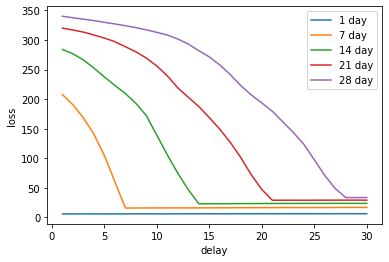

In [0]:
X = pd.read_csv('Datasets/amzn.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
y = pd.read_csv('Datasets/amzn.us.csv', header=0).loc[:, "Close"]
print("Amazon========================================")
main(X, y)

APPLE========================================
Day: 1 , Loss: 0.8299537941744259 , Delay: 1
Day: 1 , Loss: 0.854366233629432 , Delay: 2
Day: 1 , Loss: 0.8605915531761015 , Delay: 3
Day: 1 , Loss: 0.8635338770365121 , Delay: 4
Day: 1 , Loss: 0.8570975189557178 , Delay: 5
Day: 1 , Loss: 0.8569300136539483 , Delay: 6
Day: 1 , Loss: 0.8665139334738673 , Delay: 7
Day: 1 , Loss: 0.8701388330901157 , Delay: 8
Day: 1 , Loss: 0.8752976674248013 , Delay: 9
Day: 1 , Loss: 0.8753536121724713 , Delay: 10
Day: 1 , Loss: 0.8822835927390021 , Delay: 11
Day: 1 , Loss: 0.8938154406294616 , Delay: 12
Day: 1 , Loss: 0.8948867628168423 , Delay: 13
Day: 1 , Loss: 0.9041345807614429 , Delay: 14
Day: 1 , Loss: 0.9221783010153234 , Delay: 15
Day: 1 , Loss: 0.9110891413154648 , Delay: 16
Day: 1 , Loss: 0.911161995516629 , Delay: 17
Day: 1 , Loss: 0.9201708596970376 , Delay: 18
Day: 1 , Loss: 0.9256853568088433 , Delay: 19
Day: 1 , Loss: 0.9300204165165618 , Delay: 20
Day: 1 , Loss: 0.9378513079594181 , Delay: 21

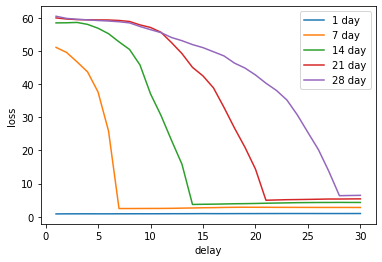

In [0]:
X = pd.read_csv('Datasets/aapl.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
y = pd.read_csv('Datasets/aapl.us.csv', header=0).loc[:, "Close"]
print("APPLE========================================")
main(X, y)

Microsoft========================================
Day: 1 , Loss: 0.3868970930958772 , Delay: 1
Day: 1 , Loss: 0.3845963263976008 , Delay: 2
Day: 1 , Loss: 0.3855804328664044 , Delay: 3
Day: 1 , Loss: 0.3857031749300892 , Delay: 4
Day: 1 , Loss: 0.3862154687420658 , Delay: 5
Day: 1 , Loss: 0.3875621457800615 , Delay: 6
Day: 1 , Loss: 0.3878347339944496 , Delay: 7
Day: 1 , Loss: 0.3897418505026948 , Delay: 8
Day: 1 , Loss: 0.3892788360996191 , Delay: 9
Day: 1 , Loss: 0.3904733044256345 , Delay: 10
Day: 1 , Loss: 0.39060100187313246 , Delay: 11
Day: 1 , Loss: 0.3933307988255151 , Delay: 12
Day: 1 , Loss: 0.3932635855299554 , Delay: 13
Day: 1 , Loss: 0.3941677432554945 , Delay: 14
Day: 1 , Loss: 0.39409958401345213 , Delay: 15
Day: 1 , Loss: 0.3937394094668232 , Delay: 16
Day: 1 , Loss: 0.39540864502636414 , Delay: 17
Day: 1 , Loss: 0.3959871956563547 , Delay: 18
Day: 1 , Loss: 0.3956879616160712 , Delay: 19
Day: 1 , Loss: 0.39645695934811215 , Delay: 20
Day: 1 , Loss: 0.39679417447197796 

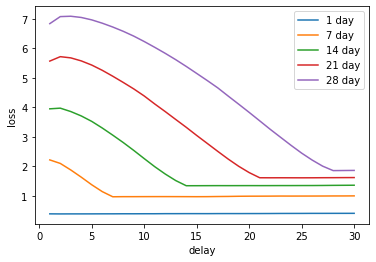

In [0]:
X = pd.read_csv('Datasets/msft.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
y = pd.read_csv('Datasets/msft.us.csv', header=0).loc[:, "Close"]
print("Microsoft========================================")
main(X, y)

Google========================================
Day: 1 , Loss: 6.924203682795915 , Delay: 1
Day: 1 , Loss: 6.956327577719505 , Delay: 2
Day: 1 , Loss: 6.983063918733071 , Delay: 3
Day: 1 , Loss: 7.039787532095154 , Delay: 4
Day: 1 , Loss: 7.063463579339009 , Delay: 5
Day: 1 , Loss: 7.036457933889139 , Delay: 6
Day: 1 , Loss: 7.035871112941241 , Delay: 7
Day: 1 , Loss: 7.051381372682142 , Delay: 8
Day: 1 , Loss: 7.04986452444908 , Delay: 9
Day: 1 , Loss: 7.057608090428593 , Delay: 10
Day: 1 , Loss: 7.053012325166434 , Delay: 11
Day: 1 , Loss: 7.070099381186228 , Delay: 12
Day: 1 , Loss: 7.071441154659598 , Delay: 13
Day: 1 , Loss: 7.083483788487118 , Delay: 14
Day: 1 , Loss: 7.098803015078742 , Delay: 15
Day: 1 , Loss: 7.092204988250433 , Delay: 16
Day: 1 , Loss: 7.1097085601773795 , Delay: 17
Day: 1 , Loss: 7.129890773796217 , Delay: 18
Day: 1 , Loss: 7.127314117407157 , Delay: 19
Day: 1 , Loss: 7.149339045910134 , Delay: 20
Day: 1 , Loss: 7.152227318165784 , Delay: 21
Day: 1 , Loss: 7.

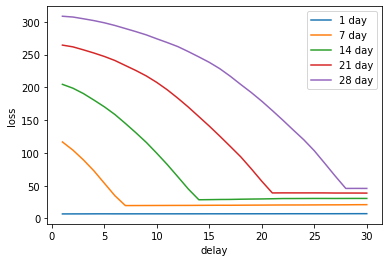

In [0]:
X = pd.read_csv('Datasets/googl.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
y = pd.read_csv('Datasets/googl.us.csv', header=0).loc[:, "Close"]
print("Google========================================")
main(X, y)

# L1 Regularization

In [0]:
# L1 Regularization
from sklearn.linear_model import Lasso, Ridge
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning


# return alpha with lowest loss for Lasso regularization 
@ignore_warnings(category=ConvergenceWarning)
def get_alpha(Xtr2, Xts2, ytr2, yts2):
  clf = Lasso()
  alphas = [10**-5, 10**-3, 10**-1, 10**1, 10**3, 10**5]
  optimal_alpha = alphas[0]
  best_loss = None
  for a in alphas:
      clf.set_params(alpha=a)
      clf.fit(Xtr2, ytr2)
      yhat2 = clf.predict(Xts2)
      loss = np.mean(np.abs(yhat2-yts2))
      if best_loss == None: 
        best_loss = loss
      else:
        if loss < best_loss:
          best_loss = loss
          optimal_alpha = a
  print("Optimal alpha:", optimal_alpha)
  return optimal_alpha

# Ridge ##################################
@ignore_warnings(category=ConvergenceWarning)
def get_L2_regularization_loss(X, y):
  Xtr2, Xts2, ytr2, yts2 = train_test_split(X,y,test_size=0.30, shuffle=False)
  alpha = get_alpha_L2(Xtr2, Xts2, ytr2, yts2)
  clf = Ridge(alpha=alpha)
  clf.fit(Xtr2, ytr2)
  yhat2 = clf.predict(Xts2)
  loss = np.mean(np.abs(yhat2-yts2))
  return loss

# return alpha with lowest loss for Lasso regularization 
@ignore_warnings(category=ConvergenceWarning)
def get_alpha_L2(Xtr2, Xts2, ytr2, yts2):
  clf = Ridge()
  alphas = [10**-5, 10**-3, 10**-1, 10**1, 10**3, 10**5]
  optimal_alpha = alphas[0]
  best_loss = None
  for a in alphas:
      clf.set_params(alpha=a)
      clf.fit(Xtr2, ytr2)
      yhat2 = clf.predict(Xts2)
      loss = np.mean(np.abs(yhat2-yts2))
      if best_loss == None: 
        best_loss = loss
      else:
        if loss < best_loss:
          best_loss = loss
          optimal_alpha = a
  print("Optimal alpha:", optimal_alpha)
  return optimal_alpha

def compare_losses_2(X, y, delay1, day1, delay2, day2, delay3, day3, delay4, day4, delay5, day5):
  print("1 day ahead")
  Xdly, ydly = create_dly_data(X,y,delay1, day1)
  L1_loss = get_L2_regularization_loss(Xdly, ydly)
  print("with regularization:",L1_loss)

  Xtr2, Xts2, ytr2, yts2 = train_test_split(Xdly,ydly,test_size=0.30, shuffle=False)
  reg = LinearRegression()
  reg.fit(Xtr2, ytr2)
  yhat2 = reg.predict(Xts2)
  loss = np.mean(np.abs(yhat2-yts2))
  print("no regularization:", loss)

  print("=======================")
  print("7 days ahead")
  Xdly, ydly = create_dly_data(X,y,delay2, day2)
  L1_loss = get_L2_regularization_loss(Xdly, ydly)
  print("with regularization:",L1_loss)

  Xtr2, Xts2, ytr2, yts2 = train_test_split(Xdly,ydly,test_size=0.30, shuffle=False)
  reg = LinearRegression()
  reg.fit(Xtr2, ytr2)
  yhat2 = reg.predict(Xts2)
  loss = np.mean(np.abs(yhat2-yts2))
  print("no regularization:",loss)

  print("=======================")
  print("14 days ahead")
  Xdly, ydly = create_dly_data(X,y,delay3, day3)
  L1_loss = get_L2_regularization_loss(Xdly, ydly)
  print("with regularization:",L1_loss)

  Xtr2, Xts2, ytr2, yts2 = train_test_split(Xdly,ydly,test_size=0.30, shuffle=False)
  reg = LinearRegression()
  reg.fit(Xtr2, ytr2)
  yhat2 = reg.predict(Xts2)
  loss = np.mean(np.abs(yhat2-yts2))
  print("no regularization:",loss)

  print("=======================")
  print("21 days ahead")
  Xdly, ydly = create_dly_data(X,y,delay4, day4)
  L1_loss = get_L2_regularization_loss(Xdly, ydly)
  print("with regularization:",L1_loss)

  Xtr2, Xts2, ytr2, yts2 = train_test_split(Xdly,ydly,test_size=0.30, shuffle=False)
  reg = LinearRegression()
  reg.fit(Xtr2, ytr2)
  yhat2 = reg.predict(Xts2)
  loss = np.mean(np.abs(yhat2-yts2))
  print("no regularization:",loss)
  
  print("=======================")
  print("28 days ahead")
  Xdly, ydly = create_dly_data(X,y,delay5, day5)
  L1_loss = get_L2_regularization_loss(Xdly, ydly)
  print("with regularization:",L1_loss)

  Xtr2, Xts2, ytr2, yts2 = train_test_split(Xdly,ydly,test_size=0.30, shuffle=False)
  reg = LinearRegression()
  reg.fit(Xtr2, ytr2)
  yhat2 = reg.predict(Xts2)
  loss = np.mean(np.abs(yhat2-yts2))
  print("no regularization:",loss)
###################################################


@ignore_warnings(category=ConvergenceWarning)
def get_L1_regularization_loss(X, y):
  Xtr2, Xts2, ytr2, yts2 = train_test_split(X,y,test_size=0.30, shuffle=False)
  alpha = get_alpha(Xtr2, Xts2, ytr2, yts2)
  clf = Lasso(alpha=alpha)
  clf.fit(Xtr2, ytr2)
  yhat2 = clf.predict(Xts2)
  loss = np.mean(np.abs(yhat2-yts2))
  return loss

# prints L1_loss for the days_ahead: 1, 7, 14 using their optimal delay
def compare_losses(X, y, delay1, day1, delay2, day2, delay3, day3, delay4, day4, delay5, day5):
  print("1 day ahead")
  Xdly, ydly = create_dly_data(X,y,delay1, day1)
  L1_loss = get_L1_regularization_loss(Xdly, ydly)
  print("with regularization:",L1_loss)

  Xtr2, Xts2, ytr2, yts2 = train_test_split(Xdly,ydly,test_size=0.30, shuffle=False)
  reg = LinearRegression()
  reg.fit(Xtr2, ytr2)
  yhat2 = reg.predict(Xts2)
  loss = np.mean(np.abs(yhat2-yts2))
  print("no regularization:", loss)

  print("=======================")
  print("7 days ahead")
  Xdly, ydly = create_dly_data(X,y,delay2, day2)
  L1_loss = get_L1_regularization_loss(Xdly, ydly)
  print("with regularization:",L1_loss)

  Xtr2, Xts2, ytr2, yts2 = train_test_split(Xdly,ydly,test_size=0.30, shuffle=False)
  reg = LinearRegression()
  reg.fit(Xtr2, ytr2)
  yhat2 = reg.predict(Xts2)
  loss = np.mean(np.abs(yhat2-yts2))
  print("no regularization:",loss)

  print("=======================")
  print("14 days ahead")
  Xdly, ydly = create_dly_data(X,y,delay3, day3)
  L1_loss = get_L1_regularization_loss(Xdly, ydly)
  print("with regularization:",L1_loss)

  Xtr2, Xts2, ytr2, yts2 = train_test_split(Xdly,ydly,test_size=0.30, shuffle=False)
  reg = LinearRegression()
  reg.fit(Xtr2, ytr2)
  yhat2 = reg.predict(Xts2)
  loss = np.mean(np.abs(yhat2-yts2))
  print("no regularization:",loss)

  print("=======================")
  print("21 days ahead")
  Xdly, ydly = create_dly_data(X,y,delay4, day4)
  L1_loss = get_L1_regularization_loss(Xdly, ydly)
  print("with regularization:",L1_loss)

  Xtr2, Xts2, ytr2, yts2 = train_test_split(Xdly,ydly,test_size=0.30, shuffle=False)
  reg = LinearRegression()
  reg.fit(Xtr2, ytr2)
  yhat2 = reg.predict(Xts2)
  loss = np.mean(np.abs(yhat2-yts2))
  print("no regularization:",loss)
  
  print("=======================")
  print("28 days ahead")
  Xdly, ydly = create_dly_data(X,y,delay5, day5)
  L1_loss = get_L1_regularization_loss(Xdly, ydly)
  print("with regularization:",L1_loss)

  Xtr2, Xts2, ytr2, yts2 = train_test_split(Xdly,ydly,test_size=0.30, shuffle=False)
  reg = LinearRegression()
  reg.fit(Xtr2, ytr2)
  yhat2 = reg.predict(Xts2)
  loss = np.mean(np.abs(yhat2-yts2))
  print("no regularization:",loss)


In [0]:
print("Amazon===========")
compare_losses(X_amzn, y_amzn, delay1=3, day1=1, delay2=7, day2=7, delay3=14, day3=14, delay4=21, day4=21, delay5=28, day5=28)
print("\nApple===========")
compare_losses(X_aapl, y_aapl, delay1=1, day1=1, delay2=8, day2=7, delay3=14, day3=14, delay4=21, day4=21, delay5=28, day5=28)
print("\nMicrosoft===========")
compare_losses(X_msft, y_msft, delay1=2, day1=1, delay2=7, day2=7, delay3=14, day3=14, delay4=25, day4=21, delay5=28, day5=28)
print("\nGoogle===========")
compare_losses(X_googl, y_googl, delay1=1, day1=1, delay2=7, day2=7, delay3=14, day3=14, delay4=30, day4=21, delay5=28, day5=28)

Amazon===========
1 day ahead
Optimal alpha: 0.1
with regularization: 6.529020107879564
no regularization: 5.846780501982002
7 days ahead
Optimal alpha: 0.1
with regularization: 15.867166622275263
no regularization: 15.840690131525115
14 days ahead
Optimal alpha: 10
with regularization: 21.976360170402334
no regularization: 22.893015819493623
21 days ahead
Optimal alpha: 0.1
with regularization: 26.734006060489612
no regularization: 28.97247149472299
28 days ahead
Optimal alpha: 0.1
with regularization: 31.494121146229823
no regularization: 33.46931343813433

Apple===========
1 day ahead
Optimal alpha: 1e-05
with regularization: 0.9456315377122276
no regularization: 0.8299537941744259
7 days ahead
Optimal alpha: 0.1
with regularization: 2.357120480522107
no regularization: 2.4497531811600277
14 days ahead
Optimal alpha: 0.1
with regularization: 3.286365541868666
no regularization: 3.6798129739286067
21 days ahead
Optimal alpha: 0.1
with regularization: 4.136704330596819
no regularizati

In [0]:
print("Amazon===========")
compare_losses_2(X_amzn, y_amzn, delay1=3, day1=1, delay2=7, day2=7, delay3=14, day3=14, delay4=21, day4=21, delay5=28, day5=28)
print("\nApple===========")
compare_losses_2(X_aapl, y_aapl, delay1=1, day1=1, delay2=8, day2=7, delay3=14, day3=14, delay4=21, day4=21, delay5=28, day5=28)
print("\nMicrosoft===========")
compare_losses_2(X_msft, y_msft, delay1=2, day1=1, delay2=7, day2=7, delay3=14, day3=14, delay4=25, day4=21, delay5=28, day5=28)
print("\nGoogle===========")
compare_losses_2(X_googl, y_googl, delay1=1, day1=1, delay2=7, day2=7, delay3=14, day3=14, delay4=30, day4=21, delay5=28, day5=28)

L2 = [0.8296885909983664, 2.387559092837961, 3.2937491363416824, 4.21491006282988, 5.251882745274202]
L2 = [5.835769070079282, 15.805881384857061, 21.967554680849307, 26.811784627579815, 31.463276482086577]
L2 = [0.38359004190052276, 0.964446136860517, 1.3373349989250471, 1.6063189995601368, 1.8526534120756049]
L2 = [6.924203680390338, 19.646066590935373,28.5111781520669, 37.8802465558244, 44.91073102000299]

y_aapl = [0.8299537941744259, 2.4497531811600277, 3.6798129739286067, 4.953873856716375, 6.329091793564374]
y_amzn = [5.846780501982002, 15.840690131525115, 22.893015819493623, 28.97247149472299, 33.46931343813433]
y_msft = [0.3845963263976008, 0.9658378917663144, 1.3403070791934275, 1.60887583802192,1.8529385537783296]
y_googl = [6.924203682795915, 19.649432597399187, 28.51126300314305, 38.668895678489946, 45.78529924905061]

Amazon===========
1 day ahead
Optimal alpha: 1000
with regularization: 5.835769070079282
no regularization: 5.846780501982002
7 days ahead
Optimal alpha: 1000
with regularization: 15.805881384857061
no regularization: 15.840690131525115
14 days ahead
Optimal alpha: 100000
with regularization: 21.967554680849307
no regularization: 22.893015819493623
21 days ahead
Optimal alpha: 100000
with regularization: 26.811784627579815
no regularization: 28.97247149472299
28 days ahead
Optimal alpha: 100000
with regularization: 31.463276482086577
no regularization: 33.46931343813433

Apple===========
1 day ahead


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.38902e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.38917e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.40353e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.80267e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.37312e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

Optimal alpha: 0.1
with regularization: 0.8296885909983664
no regularization: 0.8299537941744259
7 days ahead


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.0088e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.009e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.02921e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.57204e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.61264e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWa

Optimal alpha: 1000
with regularization: 2.387559092837961
no regularization: 2.4497531811600277
14 days ahead


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.72275e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.72423e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.87229e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.96875e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.65879e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

Optimal alpha: 1000
with regularization: 3.2937491363416824
no regularization: 3.6798129739286067
21 days ahead


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.87757e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.87857e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.9781e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.53801e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.18778e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlg

Optimal alpha: 1000
with regularization: 4.21491006282988
no regularization: 4.953873856716375
28 days ahead


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.15122e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.15195e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.22501e-21): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.13473e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.16019e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

Optimal alpha: 1000
with regularization: 5.251882745274202
no regularization: 6.329091793564374

Microsoft===========
1 day ahead


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.33136e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.33139e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.33449e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.64473e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.86736e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

Optimal alpha: 10
with regularization: 0.38359004190052276
no regularization: 0.3845963263976008
7 days ahead


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.37975e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.37986e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.39096e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.49432e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.37924e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

Optimal alpha: 10
with regularization: 0.964446136860517
no regularization: 0.9658378917663144
14 days ahead


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.63324e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.63331e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.64009e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.31941e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=8.73027e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

Optimal alpha: 10
with regularization: 1.3373349989250471
no regularization: 1.3403070791934275
21 days ahead


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.63076e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.63082e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.63634e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.19407e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.8402e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlg

Optimal alpha: 10
with regularization: 1.6063189995601368
no regularization: 1.60887583802192
28 days ahead


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.65414e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.65419e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.65882e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.12472e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=5.43571e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAl

Optimal alpha: 10
with regularization: 1.8526534120756049
no regularization: 1.8529385537783296

Google===========
1 day ahead
Optimal alpha: 1e-05
with regularization: 6.924203680390338
no regularization: 6.924203682795915
7 days ahead
Optimal alpha: 1000
with regularization: 19.646066590935373
no regularization: 19.649432597399187
14 days ahead
Optimal alpha: 10
with regularization: 28.5111781520669
no regularization: 28.51126300314305
21 days ahead
Optimal alpha: 100000
with regularization: 37.8802465558244
no regularization: 38.668895678489946
28 days ahead
Optimal alpha: 100000
with regularization: 44.91073102000299
no regularization: 45.78529924905061



# Logistic Regression

In [0]:
def grad_opt_adapt(grad_func, beta0, nit=5000, lr_init=1e-3):
    beta = beta0
    lr = lr_init
    L,Lgrad = grad_func(beta0)
    for it in range(nit):
        beta1 = beta - lr*Lgrad
        L1, Lgrad1 = grad_func(beta1)
        df_est = Lgrad.T@(beta1-beta)
        alpha = 0.5
        if (L1-L < alpha*df_est) and (L1 < L):
            lr = lr*2
            L = L1
            Lgrad = Lgrad1
            beta = beta1
        else:
            lr = lr/2 
        if (lr < 1e-15):
            break;
    return beta
    
def kernel_grad(alpha,K,y,lamb):
    z = K@alpha
    h = 1/(1+np.exp(-z))
    L = np.sum((1-y)*z - np.log(h)) + lamb*np.sum(z*alpha)

    # Gradient
    Lgrad = (h-y) + 2*lamb*alpha
    return L, Lgrad

def log_fit(K,y,lamb,nit=1000):
    """
    Function which minizes the logistic regression loss 
    """
    kernel_grad_eval = lambda alpha: kernel_grad(alpha,K,y,lamb)
    alpha0 = np.zeros(K.shape[0])
    alpha = grad_opt_adapt(kernel_grad_eval, alpha0, nit=nit, lr_init=1e-5)
    return alpha

In [0]:
import sklearn
from sklearn.metrics import classification_report
from sklearn import linear_model

def logistic(X, y, delay, predict_day):
  Xdly, ydly = create_dly_data(X,y,delay, predict_day)
  for i in range(len(ydly)):
      if ydly[i] - y[i] > 0:
        ydly[i] = 1 # predicted price rose up
      else: 
        ydly[i] = 0 # predicted price dropped 
  Xtr2, Xts2, ytr2, yts2 = train_test_split(Xdly,ydly,test_size=0.30, shuffle=False)
  return Xts2, yts2



  K = sklearn.metrics.pairwise.rbf_kernel(Xtr2, Xtr2, 0.05)
  alpha = log_fit(K, ytr2, 0, 5000)
  Ktest = sklearn.metrics.pairwise.pairwise_kernels(Xts2, Xtr2, metric='rbf', gamma=0.05)
  yhat = (Ktest.dot(alpha) > 0).astype(int)
  acc = np.mean(yhat == yts2)
  report = classification_report(yts2,yhat,target_names = ['drop','up'])
  print("Prediction for", predict_day, " days ahead:")
  print("Test accuracy = %f" % acc)
  print(report)
  print("====================================")

# no regularization and using lbfgs solver
def logistic2(X, y, delay, predict_day):
  logreg = linear_model.LogisticRegression(solver='lbfgs')
  Xdly, ydly = create_dly_data(X,y,delay, predict_day)
  for i in range(len(ydly)):
      if ydly[i] - y[i] > 0:
        ydly[i] = 1 # predicted price rose up
      else: 
        ydly[i] = 0 # predicted price dropped 
  Xtr2, Xts2, ytr2, yts2 = train_test_split(Xdly,ydly,test_size=0.30, shuffle=False)
  logreg.fit(Xtr2,ytr2)
  yhat = logreg.predict(Xts2)
  acc = np.mean(yhat == yts2)
  print("Prediction for", predict_day, " days ahead:")
  print("Accurcy:", acc)
  return acc

In [0]:
Xts_amzn, yts_amzn = logistic(X_amzn, y_amzn, 7, 1)

In [13]:
ytr_amzn[0:10]

array([0., 0., 0., 1., 1., 0., 0., 1., 1., 1.])

Text(0, 0.5, 'Direction')

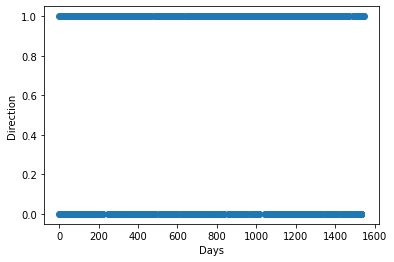

In [17]:
x_vals = np.linspace(1,len(Xts_amzn),len(Xts_amzn))
plt.scatter(x_vals, yts_amzn)
plt.xlabel("Days")
plt.ylabel("Direction")

In [0]:
# Amzn 
print("Amazon==============================")
delay = [3, 7, 14, 21, 28]
days = [1, 7, 14, 21, 28]
log_amzn = []
for i in range(len(delay)):
  log_amzn.append(logistic2(X_amzn, y_amzn, delay[i], days[i]))

Amazon==============================
Prediction for 1  days ahead:
Accurcy: 0.5579288025889968
Prediction for 7  days ahead:
Accurcy: 0.5848445595854922
Prediction for 14  days ahead:
Accurcy: 0.6083009079118028
Prediction for 21  days ahead:
Accurcy: 0.6435064935064935
Prediction for 28  days ahead:
Accurcy: 0.6566970091027308


Text(0, 0.5, 'Accuracy')

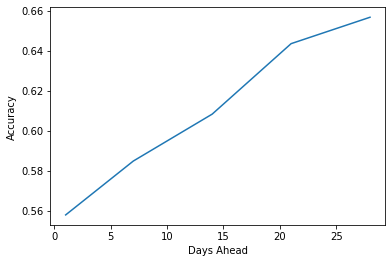

In [0]:
plt.plot(days, log_amzn)
plt.xlabel("Days Ahead")
plt.ylabel('Accuracy')

Apple==============================
Prediction for 1  days ahead:
Accurcy: 0.4719011558389797
Prediction for 7  days ahead:
Accurcy: 0.5935380933386518
Prediction for 14  days ahead:
Accurcy: 0.5976047904191617
Prediction for 21  days ahead:
Accurcy: 0.6108669596484219
Prediction for 28  days ahead:
Accurcy: 0.6205517792882846


Text(0, 0.5, 'Accuracy')

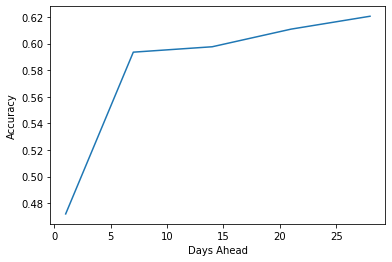

In [0]:
print("Apple==============================")
delay = [1, 8, 14, 21, 28]
days = [1, 7, 14, 21, 28]
log_aapl = []
for i in range(len(delay)):
  log_aapl.append(logistic2(X_aapl, y_aapl, delay[i], days[i]))
plt.plot(days, log_aapl)
plt.xlabel("Days Ahead")
plt.ylabel('Accuracy')

MSFT==================================
Prediction for 1  days ahead:
Accurcy: 0.46931106471816286
Prediction for 7  days ahead:
Accurcy: 0.5628917676556624
Prediction for 14  days ahead:
Accurcy: 0.5984943538268507
Prediction for 21  days ahead:
Accurcy: 0.6147403685092128
Prediction for 28  days ahead:
Accurcy: 0.611646418098031


Text(0, 0.5, 'Accuracy')

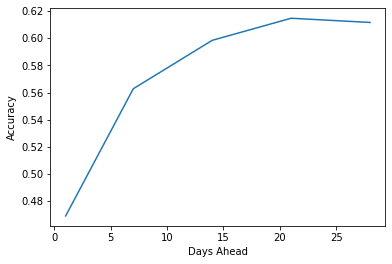

In [0]:
print("MSFT==================================")
delay = [2, 7, 14, 25, 28]
days = [1, 7, 14, 21, 28]
log_msft = []
for i in range(len(delay)):
  log_msft.append(logistic2(X_msft, y_msft, delay[i], days[i]))
plt.plot(days, log_msft)
plt.xlabel("Days Ahead")
plt.ylabel('Accuracy')

GOOGL==================================
Prediction for 1  days ahead:
Accurcy: 0.53
Prediction for 7  days ahead:
Accurcy: 0.5581162324649298
Prediction for 14  days ahead:
Accurcy: 0.5993975903614458
Prediction for 21  days ahead:
Accurcy: 0.5681130171543896
Prediction for 28  days ahead:
Accurcy: 0.5735887096774194


Text(0, 0.5, 'Accuracy')

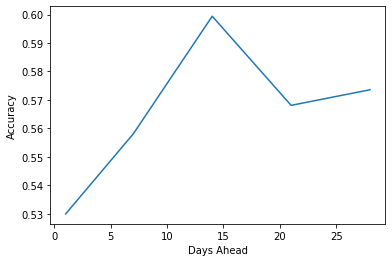

In [0]:
print("GOOGL==================================")
delay = [1, 7, 14, 30, 28]
days = [1, 7, 14, 21, 28]
log_googl = []
for i in range(len(delay)):
  log_googl.append(logistic2(X_googl, y_googl, delay[i], days[i]))
plt.plot(days, log_googl)
plt.xlabel("Days Ahead")
plt.ylabel('Accuracy')

# SVM

In [0]:
from sklearn import svm,preprocessing 
from sklearn.metrics import classification_report

def predict_up_down(X, y, delay, predict_day):
  Xdly, ydly = create_dly_data(X,y,delay, predict_day)
  # print(y[0], y[1], y[2], y[3])
  # print(ydly[0], ydly[1], ydly[2], ydly[3])
  for i in range(len(ydly)):
    if ydly[i] - y[i] > 0:
      ydly[i] = 1 # predicted price rose up
    else: 
      ydly[i] = 0 # predicted price droped 

  # make 0/1 indicator for y for up and down prediction 
  Xtr2, Xts2, ytr2, yts2 = train_test_split(Xdly,ydly,test_size=0.30, shuffle=False)

  clf = svm.SVC(probability=False, kernel="rbf")
  clf.fit(Xtr2,ytr2)
  yhat = clf.predict(Xts2)
  ysvm = (yhat > 0).astype(int)
  acc = np.mean(ysvm == yts2)
  acc2 = clf.score(Xts2,yts2)
  # report = classification_report(yts2,yhat,target_names = ['drop','up'])
  print("Prediction for", predict_day, " days ahead:")
  print('Accurary: %f'%(acc))
  # print('Accurary: %f'%(acc2))
  # print(report)
  print("====================================")
  return acc


AMZN==================================
Prediction for 1  days ahead:
Accurary: 0.554693
Accurary: 0.554693


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Prediction for 7  days ahead:
Accurary: 0.579663
Accurary: 0.579663


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Prediction for 14  days ahead:
Accurary: 0.608301
Accurary: 0.608301


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Prediction for 21  days ahead:
Accurary: 0.643506
Accurary: 0.643506
Prediction for 28  days ahead:
Accurary: 0.657997
Accurary: 0.657997


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


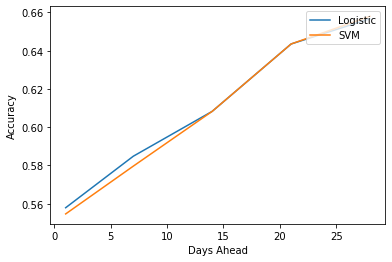

In [0]:
X = pd.read_csv('Datasets/amzn.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
y = pd.read_csv('Datasets/amzn.us.csv', header=0).loc[:, "Close"]
print("AMZN==================================")
delay = [3, 7, 14, 21, 28]
days = [1, 7, 14, 21, 28]
svm_amzn = []
for i in range(len(delay)):
  svm_amzn.append(predict_up_down(X, y, delay[i], days[i]))

plt.plot(days, log_amzn)
plt.plot(days, svm_amzn)
plt.xlabel("Days Ahead")
plt.ylabel('Accuracy')
plt.legend(["Logistic", "SVM"], loc='upper right')

APPL==================================
Prediction for 1  days ahead:
Accurary: 0.483460
Prediction for 7  days ahead:
Accurary: 0.539689
Prediction for 14  days ahead:
Accurary: 0.596806
Prediction for 21  days ahead:
Accurary: 0.612066
Prediction for 28  days ahead:
Accurary: 0.629348


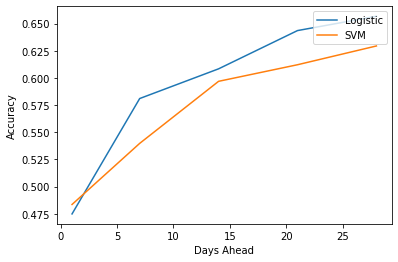

In [0]:
X = pd.read_csv('Datasets/aapl.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
y = pd.read_csv('Datasets/aapl.us.csv', header=0).loc[:, "Close"]
print("APPL==================================")
delay = [1, 8, 14, 21, 28]
days = [1, 7, 14, 21, 28]
svm_aapl = []
for i in range(len(delay)):
  svm_aapl.append(predict_up_down(X, y, delay[i], days[i]))

plt.plot(days, log_aapl)
plt.plot(days, svm_aapl)
plt.xlabel("Days Ahead")
plt.ylabel('Accuracy')
plt.legend(["Logistic", "SVM"], loc='upper right')


MSFT==================================
Prediction for 1  days ahead:
Accurary: 0.456785
Prediction for 7  days ahead:
Accurary: 0.556206
Prediction for 14  days ahead:
Accurary: 0.571309
Prediction for 21  days ahead:
Accurary: 0.587940
Prediction for 28  days ahead:
Accurary: 0.612484


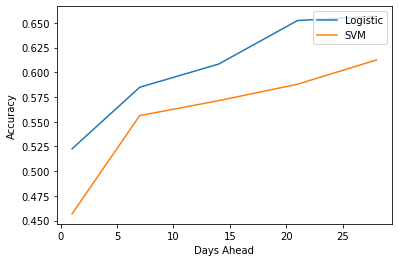

In [0]:
X = pd.read_csv('Datasets/msft.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
y = pd.read_csv('Datasets/msft.us.csv', header=0).loc[:, "Close"]
print("MSFT==================================")
delay = [2, 7, 14, 25, 28]
days = [1, 7, 14, 21, 28]
svm_msft = []
for i in range(len(delay)):
  svm_msft.append(predict_up_down(X, y, delay[i], days[i]))

plt.plot(days, log_msft)
plt.plot(days, svm_msft)
plt.xlabel("Days Ahead")
plt.ylabel('Accuracy')
plt.legend(["Logistic", "SVM"], loc='upper right')

GOOGL==================================
Prediction for 1  days ahead:
Accurary: 0.530000
Prediction for 7  days ahead:
Accurary: 0.559118
Prediction for 14  days ahead:
Accurary: 0.599398
Prediction for 21  days ahead:
Accurary: 0.603431
Prediction for 28  days ahead:
Accurary: 0.598790


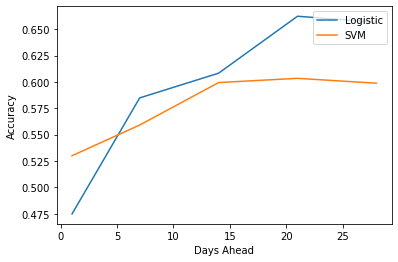

In [0]:
X = pd.read_csv('Datasets/googl.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
y = pd.read_csv('Datasets/googl.us.csv', header=0).loc[:, "Close"]
print("GOOGL==================================")
delay = [1, 7, 14, 30, 28]
days = [1, 7, 14, 21, 28]
svm_googl = []
for i in range(len(delay)):
  svm_googl.append(predict_up_down(X, y, delay[i], days[i]))

plt.plot(days, log_googl)
plt.plot(days, svm_googl)
plt.xlabel("Days Ahead")
plt.ylabel('Accuracy')
plt.legend(["Logistic", "SVM"], loc='upper right')

Amazon==============================


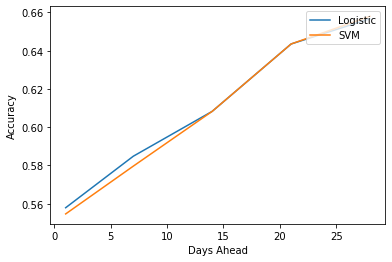

In [0]:
print("Amazon==============================")
plt.plot(days, log_amzn)
plt.plot(days, svm_amzn)
plt.xlabel("Days Ahead")
plt.ylabel('Accuracy')
plt.legend(["Logistic", "SVM"], loc='upper right')

Apple==============================


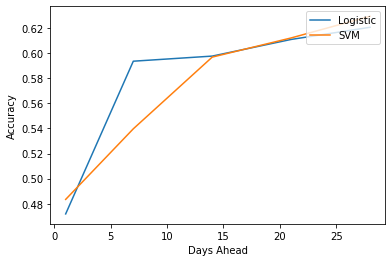

In [0]:
print("Apple==============================")
plt.plot(days, log_aapl)
plt.plot(days, svm_aapl)
plt.xlabel("Days Ahead")
plt.ylabel('Accuracy')
plt.legend(["Logistic", "SVM"], loc='upper right')

Microsoft==============================


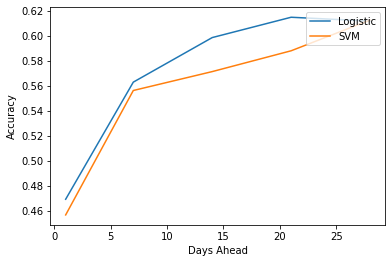

In [0]:
print("Microsoft==============================")
plt.plot(days, log_msft)
plt.plot(days, svm_msft)
plt.xlabel("Days Ahead")
plt.ylabel('Accuracy')
plt.legend(["Logistic", "SVM"], loc='upper right')

Google==============================


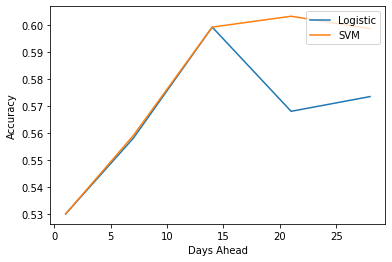

In [0]:
print("Google==============================")
plt.plot(days, log_googl)
plt.plot(days, svm_googl)
plt.xlabel("Days Ahead")
plt.ylabel('Accuracy')
plt.legend(["Logistic", "SVM"], loc='upper right')

# 

Apple


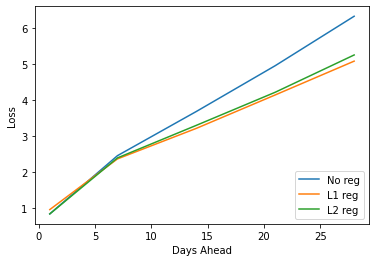

In [0]:
import matplotlib.pyplot as plt
print("Apple")
L2_aapl = [0.8296885909983664, 2.387559092837961, 3.2937491363416824, 4.21491006282988, 5.251882745274202]
L2_amzn = [5.835769070079282, 15.805881384857061, 21.967554680849307, 26.811784627579815, 31.463276482086577]
L2_msft = [0.38359004190052276, 0.964446136860517, 1.3373349989250471, 1.6063189995601368, 1.8526534120756049]
L2_googl = [6.924203680390338, 19.646066590935373,28.5111781520669, 37.8802465558244, 44.91073102000299]
y_aapl = [0.8299537941744259, 2.4497531811600277, 3.6798129739286067, 4.953873856716375, 6.329091793564374]
y_amzn = [5.846780501982002, 15.840690131525115, 22.893015819493623, 28.97247149472299, 33.46931343813433]
y_msft = [0.3845963263976008, 0.9658378917663144, 1.3403070791934275, 1.60887583802192,1.8529385537783296]
y_googl = [6.924203682795915, 19.649432597399187, 28.51126300314305, 38.668895678489946, 45.78529924905061]
x = [1, 7, 14, 21, 28]
y_reg = [0.95, 2.36, 3.21, 4.14, 5.08]
plt.plot(x, y_aapl)
plt.plot(x, y_reg)
plt.plot(x, L2_aapl)
plt.xlabel("Days Ahead")
plt.ylabel('Loss')
# plt.legend(["No reg", "L1 reg"], loc='lower right')
plt.legend(["No reg", "L1 reg", "L2 reg"], loc='lower right')


Amazon


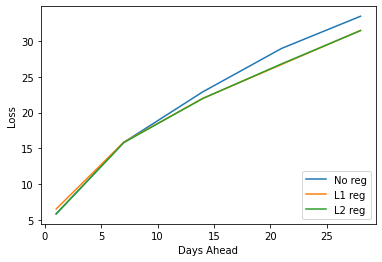

In [0]:
print("Amazon")
x = [1, 7, 14, 21, 28]
y_reg = [6.53, 15.87, 21.98, 26.73, 31.49]
plt.plot(x, y_amzn)
plt.plot(x, y_reg)
plt.plot(x, L2_amzn)
plt.xlabel("Days Ahead")
plt.ylabel('Loss')
plt.legend(["No reg", "L1 reg", "L2 reg"], loc='lower right')
# plt.legend(["No reg", "L1 reg"], loc='lower right')

Microsoft


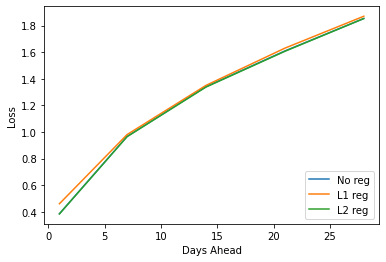

In [0]:
print("Microsoft")
x = [1, 7, 14, 21, 28]
y_reg = [0.46, 0.98, 1.35, 1.63, 1.87]
plt.plot(x, y_msft)
plt.plot(x, y_reg)
plt.plot(x, L2_msft)
plt.xlabel("Days Ahead")
plt.ylabel('Loss')
plt.legend(["No reg", "L1 reg", "L2 reg"], loc='lower right')
# plt.legend(["No reg", "L1 reg"], loc='lower right')

Google


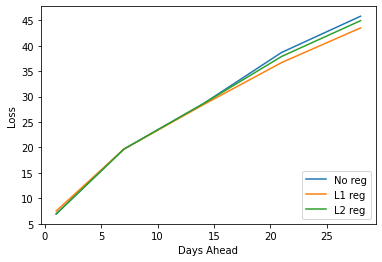

In [0]:
print("Google")
x = [1, 7, 14, 21, 28]
y_reg = [7.5, 19.65, 28.33, 36.68,43.49]
plt.plot(x, y_googl)
plt.plot(x, y_reg)
plt.plot(x, L2_googl)
plt.xlabel("Days Ahead")
plt.ylabel('Loss')
plt.legend(["No reg", "L1 reg", "L2 reg"], loc='lower right')
# plt.legend(["No reg", "L1 reg"], loc='lower right')

# Convolution

# Old Stuff


In [0]:
from sklearn.metrics import mean_squared_error
from scipy import stats
import math


# Xtr2, Xts2, ytr2, yts2 = train_test_split(Xdly,ydly,test_size=0.30, shuffle=False)
# reg = LinearRegression()
# reg.fit(Xtr2, ytr2)
# yhat2 = reg.predict(Xts2)
# loss1 = np.sum(np.abs(yhat2-yts2))

# yhat2 = yhat2[30:90]
# yts2 = yts2[30:90]
# variance = np.mean((yhat2-yts2)**2)
# # covar = np.mean(())
# stdev = variance**(1/2)

# se = stdev*((1/len(yhat2))+(yts2-np.mean(yts2))**2/np.std(yts2)**2)**(1/2)
# tcrit = stats.t.ppf(1-0.025, len(yhat2))
# confidence_interval = tcrit*se
# upper_limit = yts2 + confidence_interval 
# lower_limit = yts2 - confidence_interval

# se = stdev*(1+ (1/len(yhat2))+(yhat2-np.mean(yts2))**2/np.std(yts2)**2)**(1/2)
# pred_interval = tcrit*se
# upper_limit_p = yhat2 + pred_interval
# lower_limit_p = yhat2 - pred_interval


# calculate accuracy
# same = 0
# for i in range(len(yts2)):
#   price = yts2[i] 
#   predicted = yhat2[i]
#   if np.abs(price - predicted) <= 1: same += 1
# print("acc:", same*100/len(yts2))


# X = pd.read_csv('Datasets/msft.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
# y = pd.read_csv('Datasets/msft.us.csv', header=0).loc[:, "Close"]
# print("Amazon stocks:")
# loss1 = get_loss(X, y, 1)
# print('Loss for 1 day ahead:{0:1.3f}'.format(loss1))
# loss7 = get_loss(X, y, 7)
# print('Loss for 7 day ahead:{0:1.3f}'.format(loss7))
# loss14 = get_loss(X, y, 14)
# print('Loss for 14 day ahead:{0:1.3f}'.format(loss14))
# loss21 = get_loss(X, y, 21)
# print('Loss for 21 day ahead:{0:1.3f}'.format(loss21))
# loss28 = get_loss(X, y, 28)
# print('Loss for 28 day ahead:{0:1.3f}'.format(loss28))

X = pd.read_csv('Datasets/msft.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
y = pd.read_csv('Datasets/msft.us.csv', header=0).loc[:, "Close"]
print("Microsoft stocks:")
# loss1 = get_loss(X, y, 1, 3)
# print('Loss for 1 day ahead:{0:1.3f}'.format(loss1))
# loss7 = get_loss(X, y, 7)
# print('Loss for 7 day ahead:{0:1.3f}'.format(loss7))
# loss14 = get_loss(X, y, 14)
# print('Loss for 14 day ahead:{0:1.3f}'.format(loss14))
# loss21 = get_loss(X, y, 21)
# print('Loss for 21 day ahead:{0:1.3f}'.format(loss21))
# loss28 = get_loss(X, y, 28)
# print('Loss for 28 day ahead:{0:1.3f}'.format(loss28))
Xdly, ydly = create_dly_data(X, y, 3, 1)
Xtr, Xts, ytr, yts = train_test_split(Xdly,ydly,test_size=0.30, shuffle=False)
reg = LinearRegression()
reg.fit(Xtr, ytr)

# X = pd.read_csv('Datasets/aapl.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
# y = pd.read_csv('Datasets/aapl.us.csv', header=0).loc[:, "Close"]
# print("Apple stocks:")
# loss1 = get_loss(X, y, 1)
# print('Loss for 1 day ahead:{0:1.3f}'.format(loss1))
# loss7 = get_loss(X, y, 7)
# print('Loss for 7 day ahead:{0:1.3f}'.format(loss7))
# loss14 = get_loss(X, y, 14)
# print('Loss for 14 day ahead:{0:1.3f}'.format(loss14))
# loss21 = get_loss(X, y, 21)
# print('Loss for 21 day ahead:{0:1.3f}'.format(loss21))
# loss28 = get_loss(X, y, 28)
# print('Loss for 28 day ahead:{0:1.3f}'.format(loss28))

# X = pd.read_csv('Datasets/googl.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
# y = pd.read_csv('Datasets/googl.us.csv', header=0).loc[:, "Close"]
# print("Google stocks:")
# loss1 = get_loss(X, y, 1)
# print('Loss for 1 day ahead:{0:1.3f}'.format(loss1))
# loss7 = get_loss(X, y, 7)
# print('Loss for 7 day ahead:{0:1.3f}'.format(loss7))
# loss14 = get_loss(X, y, 14)
# print('Loss for 14 day ahead:{0:1.3f}'.format(loss14))
# loss21 = get_loss(X, y, 21)
# print('Loss for 21 day ahead:{0:1.3f}'.format(loss21))
# loss28 = get_loss(X, y, 28)
# print('Loss for 28 day ahead:{0:1.3f}'.format(loss28))



Microsoft stocks:


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

5.859774791894508
5.864168138248211
5.846780501982002
5.86125304085329
5.861350478537498
5.864574258318344
5.8816373393274235
5.937019083961263
5.944751291919345
5.964934278452018
5.982351011611527
5.992352499167904
6.0227774589219925
6.038937041761376
6.065325097795316
6.06638316878348
6.078438019175885
6.094974882881335
6.109619613390919
6.1069546842160864
6.107354241488967
6.143687755639267
6.142245520966116
6.15258799120007
6.148171089348078
6.168939608881414
6.158984460611445
6.178036496967084
6.185716025711311
6.196031951079284


Text(0, 0.5, 'loss')

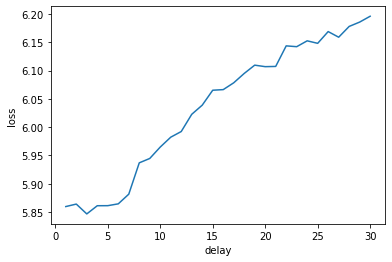

In [0]:
X = pd.read_csv('Datasets/amzn.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
y = pd.read_csv('Datasets/amzn.us.csv', header=0).loc[:, "Close"]
losses = []
index = 1
delays = []
for i in range(1,31):
  res = get_loss(X, y, i)
  print(res)
  losses.append(res)
  delays.append(index)
  index += 1
plt.plot(delays, losses)
plt.xlabel("delay")
plt.ylabel("loss")

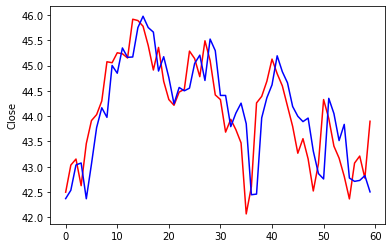

In [0]:
# Plot the scatter plot of the measured data for AMAZON
x_vals = np.linspace(0,len(yhat2)-1,len(yhat2))
plt.plot(x_vals, yts2, c="red")
plt.plot(x_vals, yhat2, c="blue")
# plt.plot(x_vals, upper_limit, c="green")
# plt.plot(x_vals, lower_limit, c="yellow")
# plt.plot(x_vals, upper_limit_p, c="purple")
# plt.plot(x_vals, lower_limit_p, c="orange")

plt.xlabel('Days from Jan 1 2020')
plt.ylabel('Closing price');
plt.legend(["red", "blue"], pos="top right")

ValueError: ignored

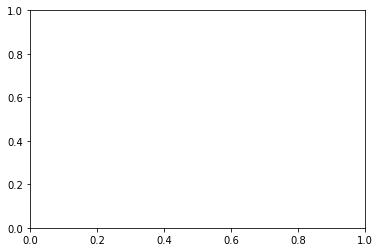

In [0]:
# Plot the scatter plot of the measured data for Amazon
X = pd.read_csv('Datasets/amzn.us.csv', header=0).loc[:,("Open","High","Low","Volume")]
y = pd.read_csv('Datasets/amzn.us.csv', header=0).loc[:, "Close"]
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.30, shuffle=False)
reg = LinearRegression().fit(Xtr, ytr)
yhat2 = reg.predict(Xts)
x_vals = np.linspace(0,len(yhat2)-1,len(yhat2))
# plt.plot(X, y, c="red")
plt.plot(x_vals, y, c="blue")
plt.xlabel('')
plt.ylabel('Close');

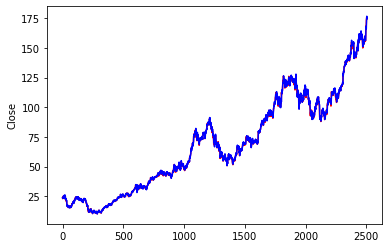

In [0]:
# Plot the scatter plot of the measured data for APPLE
x_vals = np.linspace(0,len(yhat2)-1,len(yhat2))
plt.plot(x_vals, yts2, c="red")
plt.plot(x_vals, yhat2, c="blue")
# plt.xlabel('')
plt.ylabel('Close');

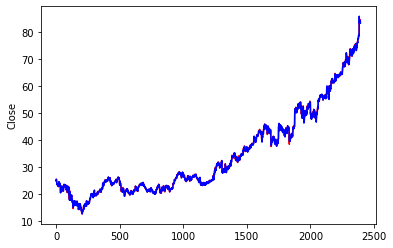

In [0]:
# Plot the scatter plot of the measured data for MICROSOFT
x_vals = np.linspace(0,len(yhat2)-1,len(yhat2))
plt.plot(x_vals, yts2, c="red")
plt.plot(x_vals, yhat2, c="blue")
# plt.xlabel('')
plt.ylabel('Close');

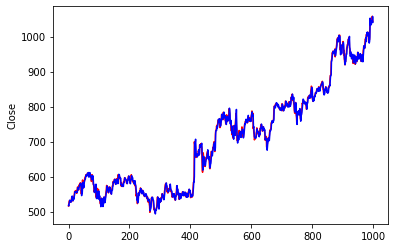

In [0]:
# Plot the scatter plot of the measured data for GOOGLE
x_vals = np.linspace(0,len(yhat2)-1,len(yhat2))
plt.plot(x_vals, yts2, c="red")
plt.plot(x_vals, yhat2, c="blue")
# plt.xlabel('')
plt.ylabel('Close');

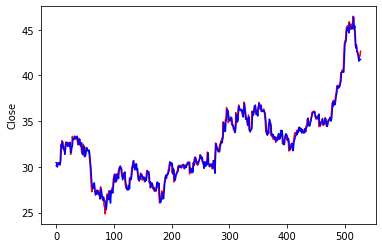

In [0]:
# Plot the scatter plot of the measured data for GM
x_vals = np.linspace(0,len(yhat2)-1,len(yhat2))
plt.plot(x_vals, yts2, c="red")
plt.plot(x_vals, yhat2, c="blue")
plt.xlabel('')
plt.ylabel('Close');

# New Section

In [0]:
import pandas_datareader.data as web
import datetime as dt

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [0]:
today = dt.datetime(2020,1,1)
df = web.DataReader("MSFT", "yahoo", today)

In [0]:
Xtest = df.loc[:,("High", "Low", "Open","Volume")]
ytest = df.loc[:,"Close"]

In [0]:
Xdly_test, ydly_test = create_dly_data(Xtest,ytest,3,1)

In [0]:
yhat_recent = reg.predict(Xdly_test)

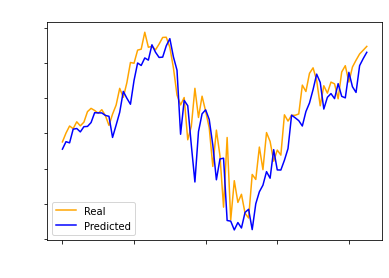

In [0]:
x_vals = np.linspace(0,len(yhat_recent)-1,len(yhat_recent))
plt.plot(x_vals, ydly_test, c="orange")
plt.plot(x_vals, yhat_recent, c="blue")
plt.xlabel("Days since January 1st", color="white")
plt.xticks(color="white")
plt.ylabel("Value", color="white")
plt.yticks(color="white")
plt.title("Microsoft Price", color="white")
plt.legend(["Real", "Predicted"]);

In [0]:
plt.plot(x_vals, ydly_test, c="orange")
plt.plot(x_vals, yhat_recent, c="blue")
plt.xlabel("Days since January 1st")
plt.ylabel("Value")
plt.legend(["Real", "Predicted"]);

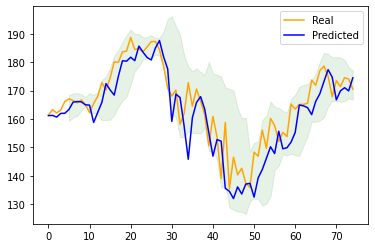

In [0]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

time_series_df = pd.DataFrame(ydly_test)
smooth_path    = time_series_df.rolling(6).mean()
path_deviation = 2 * time_series_df.rolling(6).std()

under_line     = (smooth_path-path_deviation)[0]
over_line      = (smooth_path+path_deviation)[0]

x_vals = np.linspace(0,len(yhat_recent)-1,len(yhat_recent))
# plt.plot(x_vals[30:40], ydly_test[30:40], c="orange")
# plt.plot(x_vals[30:40], yhat_recent[30:40], c="blue");
plt.plot(x_vals, ydly_test, c="orange")
plt.plot(x_vals, yhat_recent, c="blue");
plt.fill_between(path_deviation.index, under_line, over_line, color='g', alpha=.1) #std cur
# sns.x_label('')
# sns.y_label('Close');
plt.legend(["Real", "Predicted"]);

In [0]:
np.sqrt(np.mean((yhat_recent - ydly_test)**2))

7.566153967690594

In [0]:
currX = df.tail(6).loc[:,("High", "Low", "Open","Volume")]
curr = []
for i in range(5,currX.shape[0]):
    row = np.array([])
    j = 0
    while j != 6:
      row = np.hstack([currX.iloc[i-j,:],row])
      j+=1
    curr.append(row)
curr = np.array(curr)

In [0]:
reg.predict(curr)

array([171.01257681])

In [0]:
ydly_test[-1]

171.4199981689453